# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [50,100,301]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,11594,7779,12144,3252,8035,3029
2,5283,13316,20399,1809,8752,172


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-5731.0,-4701.0,-5971.0,788.0,-2272.0,637.0
1,-406.0,1983.0,4193.0,180.0,5154.0,1504.0
2,-6717.0,7520.0,12448.0,-1263.0,5871.0,-1353.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2235.0,-2532.0,-2776.0,2334.0,-207.0,1196.0
1,3090.0,4152.0,7388.0,1726.0,7219.0,2063.0
2,-3221.0,9689.0,15643.0,283.0,7936.0,-794.0


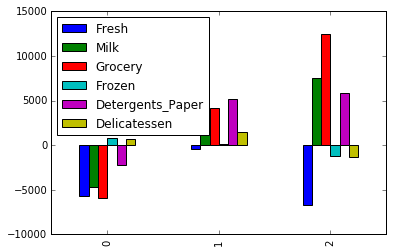

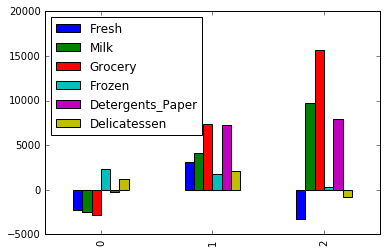

In [191]:
########################
# Statistic Comparison #
########################

(samples - data.mean().round()).plot(kind='bar')
display(samples - data.mean().round())
(samples - data.median().round()).plot(kind='bar')
display(samples - data.median().round())

**Answer:**

According to the graph above : 

- p[0] might be hotel, since it tend to spend more on Forzen and Delicatessen compared with the mean and median.

- p[1] might be retailer, since it has high spending in relation to the category mean and median for Grocery, Milk and Detergents.

- p[2] might be also a retailer,since it has also high spending in relation to the category mean and median for Grocery, Milk and Detergents.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [168]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels='Detergents_Paper',axis=1)

target = data['Detergents_Paper']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0 )
regressor.fit(X_train, y_train)



# TODO: Report the score of the prediction using the testing set
y_predict = regressor.predict(X_test)
score = r2_score(y_test, y_predict)

print "R2 score : {}".format(score)



R2 score : 0.728655181254


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

- The spending on Detergents_Paper is the target feature.
- The R2 score is about 0.73, which indicates this feature would be easily predicted by other features. It indicates that this feature could be represented by the combination of other features. Therefore, this feature might not be necessary for identifying the customers' habits. 
- The more explorations could be referenced as below section.

 [*] Fresh score : [-0.252]
 [*] Milk score : [0.366]
 [*] Grocery score : [0.603]
 [*] Frozen score : [0.254]
 [*] Detergents_Paper score : [0.729]
 [*] Delicatessen score : [-11.664]
   Visualization of the correlation-metrix   


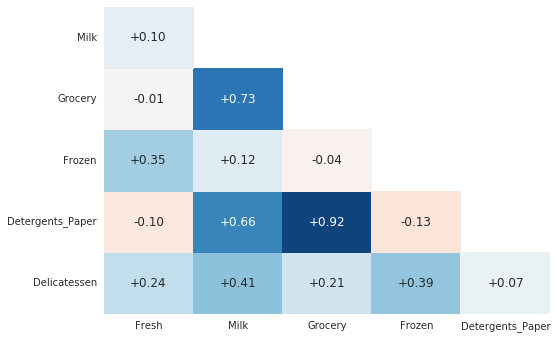

In [203]:
# For more exploration on each feature 

def more_exploration(tarFeature):
    new_data = data.drop(labels=tarFeature,axis=1)
    target = data[tarFeature]
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                        target, 
                                                        test_size=0.25, 
                                                        random_state=0)
    regressor = DecisionTreeRegressor(random_state=0 )
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    score = r2_score(y_test, y_predict)
    print " [*] {} score : [{}]".format(tarFeature,round(score,3))
    
for target in data.columns:
    more_exploration(target)


# For more exploration on each feature 

import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

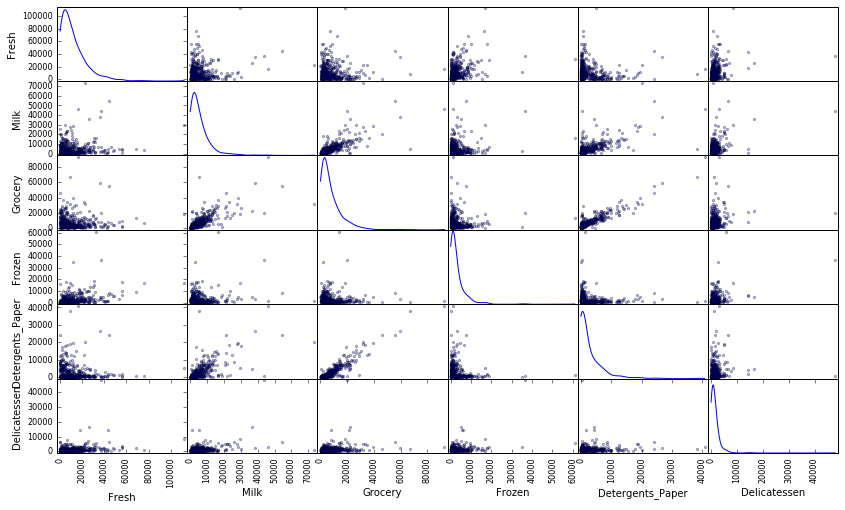

In [170]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

- Grocery and Detergents_Paper seems to show a relatively strong positive correlated with one another. 
This support the previous suspicions that the Detergents_Paper could be replaced/represented by the combination of other features.

- The distributions for all 6 features appear to be positively skewed. It seems to be log-normal distribution. The most of data of each features are close to 0. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

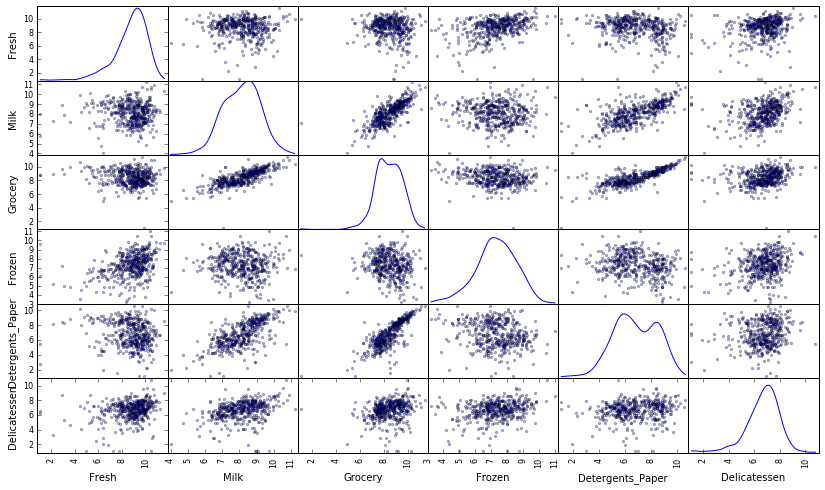

In [171]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [172]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.572249,9.496722,9.923241,7.500529,9.077038,5.147494


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [173]:
from collections import Counter

# init outliers_index to store index of outlier point 
outliers_index  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outlier)
    # record the outlier_index
    outliers_index.extend(list(outlier.index.values))
    
# OPTIONAL: Select the indices for data points you wish to remove

# drop_duplicates index
outliers  = np.unique(outliers_index)

# print out duplicates index, in order to answer the following question
# http://stackoverflow.com/questions/11528078/determining-duplicate-values-in-an-array
duplicate_index = [item for item, count in Counter(outliers_index).iteritems() if count > 1]


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- There are several data points which are outliers for more than one feature, the list of the index is [65, 66, 75, 128, 154]. 

- These data should be removed from dataset as penality. Since these data are in low freqnency and less representive,but would cause extreme large variance compared to the rest of data. It would highly impact the learning model. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


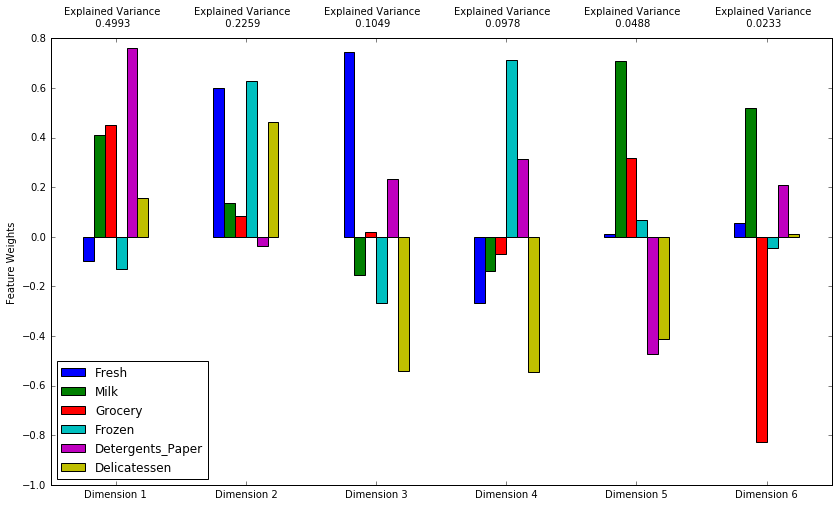

In [174]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

# The cumulative variance ==1 , since the original dimension is 6, the same as the pca-dimension.
# cumulative variance
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

As the previous result :
- In total, the first 2 components are accounting for 72.52% of all the variance in data. 
- In total, the first 4 components are accounting for 92.79% of all the variance in data. 


PCA method is a linear transformation, which comes from the eigenvalues and eigenvectors of the covariance matrix. The components would be orthogonal to each other and each component is basically contributed by the origianl features with different weighting numbers. 

As the graph shows : 
- The 1st dimension is mainly contributed by the variance from Detergents_Paper(+), Grocery(+) and Milk(+). The first 2 are exactly we identified in previous section as being most highly correlated, and could be represented by each other. 
- The 2nd dimension is mainly contributed by the variance from  Fresh(+), Frozen(+), and Delicatessen(+).   
- The 3rd dimension is mainly contributed by the variance from Fresh(-) and Delicatessen (+).
- The 4th dimension is mainly contributed by the variance from Delicatessen(-) and Frozen(+).

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [175]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0691,0.6047,-0.7706,0.2588,-1.1878,-0.0163
1,2.5291,1.3485,-0.1094,0.2050,-0.5879,0.0808
2,2.7479,-0.7080,0.9644,1.4745,1.0501,-0.0939


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [176]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [177]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0691,0.6047
1,2.5291,1.3485
2,2.7479,-0.7080


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is relatively fast and easy to understand. However, compare to GMM, K-mean method is considered to be less generative or a hard method due to its intrinsic constrain and assumptions. K-mean method is basically finding the association of the group that froms cluster in a isotropic/symmetrical spherical shape.   

On the other hand, GMM overcomes some of the drawbacks of K-means and is considered to be a more soft method. GMM soft assignment gives more information such as probabilities. The benefit comes from that GMM uses the probability function with max-likihood method. However, it costs more time to train a GMM method. 

I would chose K-means for following reasons :  
- K-means could be easily understanded and explained. 
- K-means faster and more scalableit.
- Since there are only 2 features after PCA reduction, it is usually fine to use K-means with its assumption the the cluster shape is symmetrical spherical.


Ref : https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [179]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

def multi_cluster(cluNum, Flag=False):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=cluNum, random_state=0).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    
    # print for visulization
    print "silhouette score [{}] with n_clusters [{}]".format(round(score,3), cluNum)
    
    # Flag to switch on-off the return value
    if Flag ==True:
        return preds, centers, sample_preds


# testing from 2 to 10 clusters 
for clusterNumber in range(2,11):
    multi_cluster(clusterNumber)


# return the best model and parameters for after-use 
preds, centers, sample_preds = multi_cluster(2, True)

silhouette score [0.447] with n_clusters [2]
silhouette score [0.364] with n_clusters [3]
silhouette score [0.331] with n_clusters [4]
silhouette score [0.352] with n_clusters [5]
silhouette score [0.363] with n_clusters [6]
silhouette score [0.355] with n_clusters [7]
silhouette score [0.367] with n_clusters [8]
silhouette score [0.367] with n_clusters [9]
silhouette score [0.352] with n_clusters [10]
silhouette score [0.447] with n_clusters [2]


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score of model with cluster number equal to 2 is the best.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

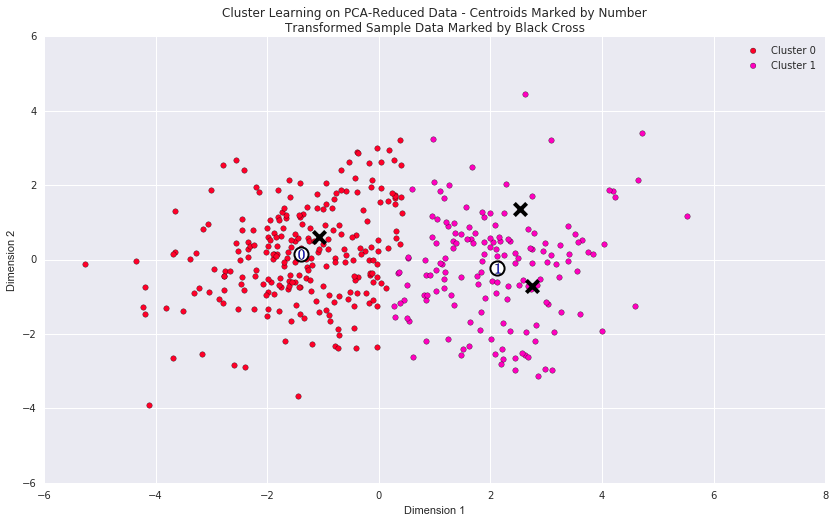

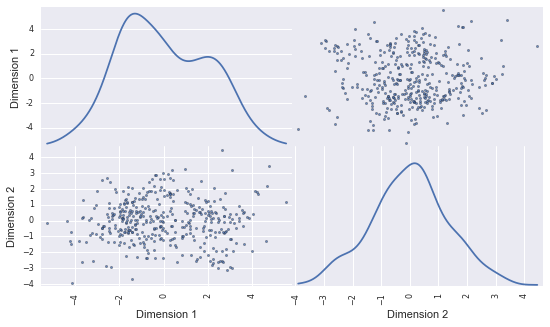

In [195]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [181]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

compare with mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2980.0,-3548.0,-5056.0,-829.0,-2418.0,-684.0
Segment 1,-7007.0,2294.0,4027.0,-1906.0,1719.0,-319.0


compare with median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,343.0,-1674.0,-2124.0,470.0,-481.0,-227.0
Segment 1,-3684.0,4168.0,6959.0,-607.0,3656.0,138.0


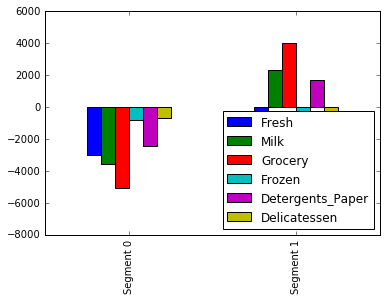

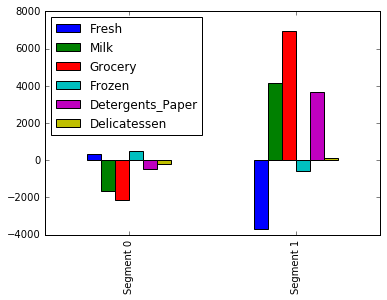

In [182]:
# Additional computation for answering the question 
import matplotlib.pyplot as plt


# data that drop the outliers
data_without_outliers = data.drop(data.index[outliers]).reset_index(drop = True)

# Then we compare with the mean, and then visuslization 
df_mean = pd.DataFrame(true_centers - np.around(data_without_outliers.mean().values))
df_mean.plot(kind='bar')
print 'compare with mean'
display(df_mean)

# Then we compare with the median, and then visuslization 
df_median = pd.DataFrame(true_centers - np.around(data_without_outliers.median().values))
df_median.plot(kind='bar')
print 'compare with median'
display(df_median)





**Answer:**

According to visualizations above : 

- by comparison with the mean and median of the data without outliers, we could infer that there are 2 kind of very different purchase-behaviours. We could basically divide customers into these 2 segments. 
- The customers in segment 0 tend to purchase more fresh and frozen than other items. The customers in segment 1 tend to purchase more grocery, milk and detergents.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,11594,7779,12144,3252,8035,3029
2,5283,13316,20399,1809,8752,172


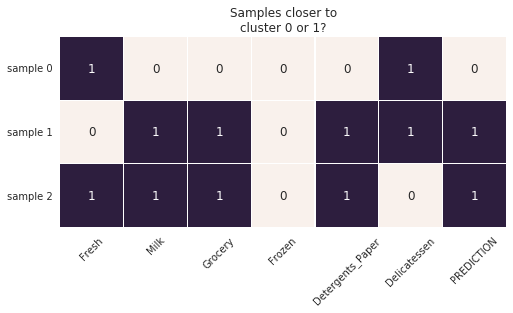

In [194]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# Display agian with previous sample
display(samples)


# Visulization of the cluster-center comparision 

import seaborn as sns
import matplotlib.pyplot as plt
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0);

**Answer:**

- Sample point 0 predicted to be in Segment 0
- Sample point 1 predicted to be in Segment 1
- Sample point 2 predicted to be in Segment 1

We could see that : 

- The p[0] tend to buy more Fresh and Frozen.
- The p[1] and p[2] are tend to buy more Grocery, Milk and Detergents.
- The results seems to match the Segment it has been assigned by our model, and consistent with the previous discussion in question 8.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

According to the PCA thory and result, all the customers could be divided into 2 segments/groups, and this 2 segments could be considered as approximately independent to each other.

Therefore, the wholesale distributor could conduct A/B testing in each segment/group separately.
The wholesale distributor could randomly select some customers from segment 0 to conduct the changing services, and the rest of those in segment 1 would be the control-group for reference. We could basically observe the react from segment 1 and to decide whether to take the changing service on this segment or not. The A/B testing could be conducted on segment 1, to observe the react in this segment/group. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**


The PCA method is a linear transformation, it basically determines the new vector-space. In order to predict or classify the new customers, we should first train a supervise learner/model in the PCA-space. The target-label would be the segment 0 and segment 1. 

To predict or classify the new customers, the PCA method could be applied to trainform the new feature vectors from original-sapce to the PCA-space, Then the supervise learner/model could be applied to predict what category might be best describe the new customer. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

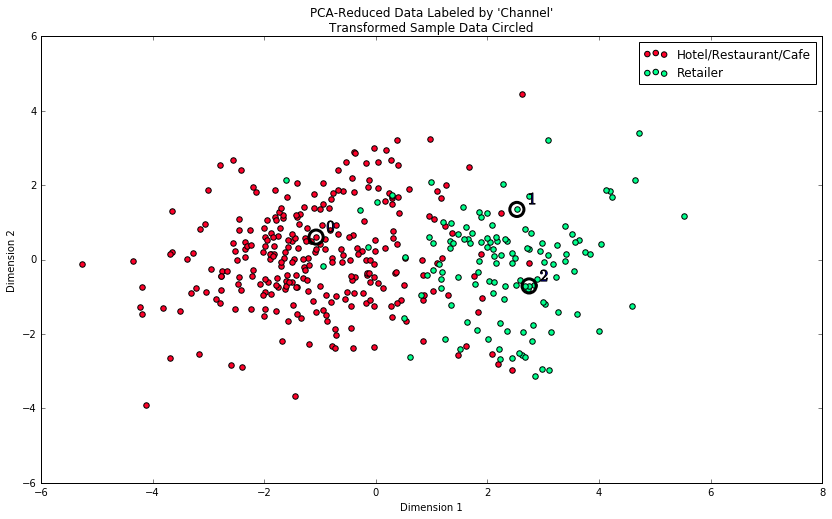

In [184]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

As the visualization above, it seems to matche well.
- Segment 1,2 in the analysis is clearly "Retail".
- Segment 0 is clearly "Hotel/Restaurants/Cafes".

It could be observed from the graph that the Segment 0 and 1 are not purely seperating Hotels/Restaurants/Cafes' and 'Retailers'. However there are only small region of intersections.

These classifications are close to my previous guess to the customer type and I think the result of the model on clustering customer in to segments is reasonable by somehow matching the business type well.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.